In [2]:
from Bio import SeqIO
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import gseapy as gp
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
cellmarker_file=pd.read_csv('enrichr/CellMarker_2024_table.txt', sep='\t')
biological_process_file=pd.read_csv('enrichr/GO_Biological_Process_2023_table.txt', sep='\t')
tissues_file=pd.read_csv('enrichr/GTEx_Tissues_V8_2023_table.txt', sep='\t')
diseases_file=pd.read_csv('enrichr/Orphanet_Augmented_2021_table.txt', sep='\t')
rna_seq=pd.read_csv('Expression data/allGene.tsv', sep='\t')
exon_file=pd.read_csv('Fasta and tsv/exon_file.tsv', sep='\t')

In [4]:
tissues_of_interest = ["Testis", "Bladder","Skin_Sun_Exposed_Lower_leg", "Nerve_Tibial", "Brain_Cortex", "Brain_Hypothalamus", "Brain_Nucleus_accumbens_basal_ganglia",	"Brain_Putamen_basal_ganglia", "Fallopian_Tube", "seg"]

# filter RNA-seq data for tissues of interest
filtered_columns = ['Name', 'Gene'] + [col for col in rna_seq.columns if col in tissues_of_interest]
data = rna_seq[filtered_columns]

data.to_csv("filtered_rnaseq_data.tsv", sep="\t", index=False)
print("Dati filtrati salvati in 'filtered_rnaseq_data.tsv'")

Dati filtrati salvati in 'filtered_rnaseq_data.tsv'


In [ ]:
# data standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 2:-1])

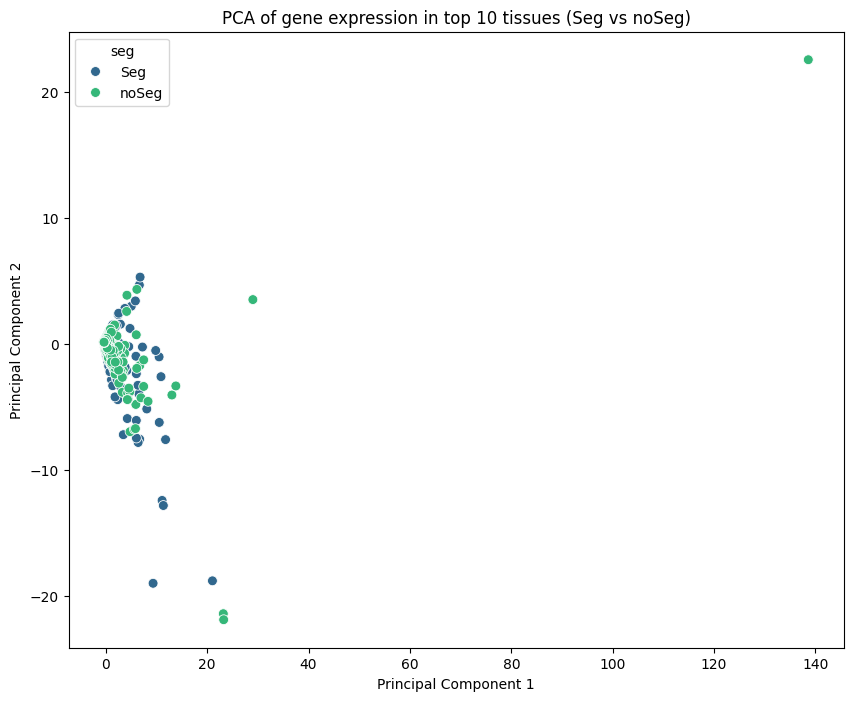

In [6]:
#dimensional reduction in 2D for data visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

#scatterplot with hue based on seg column (seg vs noseg)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_pca[:, 0], y=data_pca[:, 1],
    hue=data['seg'], palette='viridis', s=50
)
plt.title('PCA of gene expression in top 10 tissues (Seg vs noSeg)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
